### Import and webdriver setup

In [2]:
#File paths for easy access
#C:/Users/grema/Jupyter python stuff/PlayStoreScraper/chromedriver.exe
#C:/Users/jackie.yu/Documents/WeCloudData/Python/PlayStoreProject/PlayStoreScraper/chromedriver.exe

In [1]:
# For wordcloud visualizations
#!pip install wordcloud

In [3]:
# Importing libraries
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from time import sleep
from datetime import datetime

## Extra libraries for visualization use

# Importing word cloud library for visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing nltk for stop words removal and tokenizing string text
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackie.yu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jackie.yu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
# Selenium import and driver start
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome('C:/Users/jackie.yu/Documents/WeCloudData/Python/PlayStoreProject/PlayStoreScraper/chromedriver.exe')

### Parsing through the html with Selenium

In [48]:
def review_scroller(url, iterations):
"""
Expands the "Read more" button for reviews and scrolls
param url: passing in the play store review url (be sure to select "All Review" first before passing in this url)
param iterations: number of times the review scroller should scroll to the bottom of the page
"""
    driver.get(url)
    for _ in range(iterations):
        # Finding the "Read more" button for long reviews
        button_list = driver.find_elements_by_css_selector("button[jsname='gxjVle']")
        # Clicking every "Read more" button
        for button in button_list:
            driver.execute_script("arguments[0].click();", button)
        # Scrolling to end of page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-60);")
        sleep(2)
        # If there is a "Show More" button at the end of the page, click it
        try:
            driver.find_element_by_class_name("U26fgb.O0WRkf.oG5Srb.C0oVfc.n9lfJ.M9Bg4d").click()
        # Otherwise, go onto the next iteration
        except:
            pass

In [49]:

def info_collector(url):
    """
    Calls review scroller on provided url and runs 11 times (due to play store limitations)
    param: url passing in the play store review url (be sure to select "All Review" first before passing in this url)
    """
    review_scroller(url, 11)
    #Creates dictionary for reviews and retrieves review text from unexpanded reviews 
    list_of_reviews = driver.find_elements_by_css_selector("span[jsname='bN97Pc']")
    review_dict = {}
    for i, review in enumerate(list_of_reviews):
        review_dict[i] = review.text
    #collects review text from expanded reviews
    list_of_reviews2 = driver.find_elements_by_css_selector("span[jsname='fbQN7e']")
    expanded_review_dict = {}
    for i, review in enumerate(list_of_reviews2):
        expanded_review_dict[i] = review.text
    #merges the two dictionaries, this works because the dictionaries have empty spaces where a review could not be found
    #due to being expanded/unexpanded
    for i in review_dict:
        if review_dict[i] == '':
            review_dict[i] = expanded_review_dict[i]
    #finds the review category and puts it in a dictionary for each row of data        
    category = driver.find_element_by_css_selector("a[itemprop = 'genre']").get_attribute("href")[44:]
    category_dict = {i:category for i in range(len(review_dict))}
    #finds app title and puts it into dictionary for each row of data
    title = driver.find_element_by_tag_name("h1").text
    title_dict = {i:title for i in range(len(review_dict))}

    #finding review dates and collecting them as a datetime object
    #filters out developer responses(which we don't want)
    list_of_users = driver.find_elements_by_class_name("bAhLNe.kx8XBd")
    #finds date that review is posted and stores it as a datetime object
    list_of_dates = [user.find_elements_by_class_name('p2TkOb')[0].text for user in list_of_users]

    date_dict = {}

    for i, date in enumerate(list_of_dates):
        date_dict[i] = datetime.strptime(date, '%B %d, %Y')
        #date_dict[i].strftime('%Y-%m-%d') to convert back to string

    #finds how many likes a review has, no likes will be defaulted to 0 and collects them
    list_of_likes = driver.find_elements_by_class_name('jUL89d.y92BAb')
    like_dict = {}

    for i, like in enumerate(list_of_likes):
        if like.text == '':
            like_dict[i] = 0
        else:
            like_dict[i] = int(like.text)
    #finds and collects review stars
    # Parent class containing the star review
    star_parent_class = driver.find_elements_by_class_name("pf5lIe")
    # Child class containing the string star rating e.g. "Rated 5 stars out of five stars"
    list_of_stars = [parent.find_element_by_css_selector("div").get_attribute("aria-label") for parent in star_parent_class]
    star_dict = {}
    
    for i, star in enumerate(list_of_stars):
        # Retrieving reviews that do not have a float value 
        # as these come from the recommended apps on the bottom
        if not re.search('(\d\.\d)', star):        
            star_dict[i-1] = int(re.search('[0-5]', star).group())

            
    #creates a list with all created dictionaries for data frame usage
    return_list = [title_dict, category_dict, date_dict, star_dict, review_dict, like_dict]
    return return_list

### Forest data

In [7]:
#Collects and creates list for Forest
forest_list = info_collector('https://play.google.com/store/apps/details?id=cc.forestapp&hl=en_CA&gl=US&showAllReviews=true')
forest_list

[{0: 'Forest: Stay focused',
  1: 'Forest: Stay focused',
  2: 'Forest: Stay focused',
  3: 'Forest: Stay focused',
  4: 'Forest: Stay focused',
  5: 'Forest: Stay focused',
  6: 'Forest: Stay focused',
  7: 'Forest: Stay focused',
  8: 'Forest: Stay focused',
  9: 'Forest: Stay focused',
  10: 'Forest: Stay focused',
  11: 'Forest: Stay focused',
  12: 'Forest: Stay focused',
  13: 'Forest: Stay focused',
  14: 'Forest: Stay focused',
  15: 'Forest: Stay focused',
  16: 'Forest: Stay focused',
  17: 'Forest: Stay focused',
  18: 'Forest: Stay focused',
  19: 'Forest: Stay focused',
  20: 'Forest: Stay focused',
  21: 'Forest: Stay focused',
  22: 'Forest: Stay focused',
  23: 'Forest: Stay focused',
  24: 'Forest: Stay focused',
  25: 'Forest: Stay focused',
  26: 'Forest: Stay focused',
  27: 'Forest: Stay focused',
  28: 'Forest: Stay focused',
  29: 'Forest: Stay focused',
  30: 'Forest: Stay focused',
  31: 'Forest: Stay focused',
  32: 'Forest: Stay focused',
  33: 'Forest: Stay 

### Google calendar

In [51]:
#Collects and creates list for Google calendar
google_calendar_list = info_collector('https://play.google.com/store/apps/details?id=com.google.android.calendar&showAllReviews=true')
google_calendar_list

[{0: 'Google Calendar',
  1: 'Google Calendar',
  2: 'Google Calendar',
  3: 'Google Calendar',
  4: 'Google Calendar',
  5: 'Google Calendar',
  6: 'Google Calendar',
  7: 'Google Calendar',
  8: 'Google Calendar',
  9: 'Google Calendar',
  10: 'Google Calendar',
  11: 'Google Calendar',
  12: 'Google Calendar',
  13: 'Google Calendar',
  14: 'Google Calendar',
  15: 'Google Calendar',
  16: 'Google Calendar',
  17: 'Google Calendar',
  18: 'Google Calendar',
  19: 'Google Calendar',
  20: 'Google Calendar',
  21: 'Google Calendar',
  22: 'Google Calendar',
  23: 'Google Calendar',
  24: 'Google Calendar',
  25: 'Google Calendar',
  26: 'Google Calendar',
  27: 'Google Calendar',
  28: 'Google Calendar',
  29: 'Google Calendar',
  30: 'Google Calendar',
  31: 'Google Calendar',
  32: 'Google Calendar',
  33: 'Google Calendar',
  34: 'Google Calendar',
  35: 'Google Calendar',
  36: 'Google Calendar',
  37: 'Google Calendar',
  38: 'Google Calendar',
  39: 'Google Calendar',
  40: 'Goo

### Genshin Impact

In [52]:
#Collects and creates list for Genshin Impact
genshin_list = info_collector('https://play.google.com/store/apps/details?id=com.miHoYo.GenshinImpact&hl=en_CA&gl=US&showAllReviews=true')
genshin_list

[{0: 'Genshin Impact',
  1: 'Genshin Impact',
  2: 'Genshin Impact',
  3: 'Genshin Impact',
  4: 'Genshin Impact',
  5: 'Genshin Impact',
  6: 'Genshin Impact',
  7: 'Genshin Impact',
  8: 'Genshin Impact',
  9: 'Genshin Impact',
  10: 'Genshin Impact',
  11: 'Genshin Impact',
  12: 'Genshin Impact',
  13: 'Genshin Impact',
  14: 'Genshin Impact',
  15: 'Genshin Impact',
  16: 'Genshin Impact',
  17: 'Genshin Impact',
  18: 'Genshin Impact',
  19: 'Genshin Impact',
  20: 'Genshin Impact',
  21: 'Genshin Impact',
  22: 'Genshin Impact',
  23: 'Genshin Impact',
  24: 'Genshin Impact',
  25: 'Genshin Impact',
  26: 'Genshin Impact',
  27: 'Genshin Impact',
  28: 'Genshin Impact',
  29: 'Genshin Impact',
  30: 'Genshin Impact',
  31: 'Genshin Impact',
  32: 'Genshin Impact',
  33: 'Genshin Impact',
  34: 'Genshin Impact',
  35: 'Genshin Impact',
  36: 'Genshin Impact',
  37: 'Genshin Impact',
  38: 'Genshin Impact',
  39: 'Genshin Impact',
  40: 'Genshin Impact',
  41: 'Genshin Impact',
  

### Pokemon GO

In [53]:
#Collects and creates list for Pokemon Go
pokemon_list = info_collector('https://play.google.com/store/apps/details?id=com.nianticlabs.pokemongo&showAllReviews=true')
pokemon_list

[{0: 'Pokémon GO',
  1: 'Pokémon GO',
  2: 'Pokémon GO',
  3: 'Pokémon GO',
  4: 'Pokémon GO',
  5: 'Pokémon GO',
  6: 'Pokémon GO',
  7: 'Pokémon GO',
  8: 'Pokémon GO',
  9: 'Pokémon GO',
  10: 'Pokémon GO',
  11: 'Pokémon GO',
  12: 'Pokémon GO',
  13: 'Pokémon GO',
  14: 'Pokémon GO',
  15: 'Pokémon GO',
  16: 'Pokémon GO',
  17: 'Pokémon GO',
  18: 'Pokémon GO',
  19: 'Pokémon GO',
  20: 'Pokémon GO',
  21: 'Pokémon GO',
  22: 'Pokémon GO',
  23: 'Pokémon GO',
  24: 'Pokémon GO',
  25: 'Pokémon GO',
  26: 'Pokémon GO',
  27: 'Pokémon GO',
  28: 'Pokémon GO',
  29: 'Pokémon GO',
  30: 'Pokémon GO',
  31: 'Pokémon GO',
  32: 'Pokémon GO',
  33: 'Pokémon GO',
  34: 'Pokémon GO',
  35: 'Pokémon GO',
  36: 'Pokémon GO',
  37: 'Pokémon GO',
  38: 'Pokémon GO',
  39: 'Pokémon GO',
  40: 'Pokémon GO',
  41: 'Pokémon GO',
  42: 'Pokémon GO',
  43: 'Pokémon GO',
  44: 'Pokémon GO',
  45: 'Pokémon GO',
  46: 'Pokémon GO',
  47: 'Pokémon GO',
  48: 'Pokémon GO',
  49: 'Pokémon GO',
  50: 'Pok

### Instagram

In [54]:
#Collects and creates list for Instagram
insta_list = info_collector('https://play.google.com/store/apps/details?id=com.instagram.android&hl=en_CA&gl=US&showAllReviews=true')
insta_list

[{0: 'Instagram',
  1: 'Instagram',
  2: 'Instagram',
  3: 'Instagram',
  4: 'Instagram',
  5: 'Instagram',
  6: 'Instagram',
  7: 'Instagram',
  8: 'Instagram',
  9: 'Instagram',
  10: 'Instagram',
  11: 'Instagram',
  12: 'Instagram',
  13: 'Instagram',
  14: 'Instagram',
  15: 'Instagram',
  16: 'Instagram',
  17: 'Instagram',
  18: 'Instagram',
  19: 'Instagram',
  20: 'Instagram',
  21: 'Instagram',
  22: 'Instagram',
  23: 'Instagram',
  24: 'Instagram',
  25: 'Instagram',
  26: 'Instagram',
  27: 'Instagram',
  28: 'Instagram',
  29: 'Instagram',
  30: 'Instagram',
  31: 'Instagram',
  32: 'Instagram',
  33: 'Instagram',
  34: 'Instagram',
  35: 'Instagram',
  36: 'Instagram',
  37: 'Instagram',
  38: 'Instagram',
  39: 'Instagram',
  40: 'Instagram',
  41: 'Instagram',
  42: 'Instagram',
  43: 'Instagram',
  44: 'Instagram',
  45: 'Instagram',
  46: 'Instagram',
  47: 'Instagram',
  48: 'Instagram',
  49: 'Instagram',
  50: 'Instagram',
  51: 'Instagram',
  52: 'Instagram',
  5

### Tiktok

In [55]:
#Collects and creates list for TikTok
tiktok_list = info_collector('https://play.google.com/store/apps/details?id=com.zhiliaoapp.musically&showAllReviews=true')
tiktok_list

[{0: 'TikTok',
  1: 'TikTok',
  2: 'TikTok',
  3: 'TikTok',
  4: 'TikTok',
  5: 'TikTok',
  6: 'TikTok',
  7: 'TikTok',
  8: 'TikTok',
  9: 'TikTok',
  10: 'TikTok',
  11: 'TikTok',
  12: 'TikTok',
  13: 'TikTok',
  14: 'TikTok',
  15: 'TikTok',
  16: 'TikTok',
  17: 'TikTok',
  18: 'TikTok',
  19: 'TikTok',
  20: 'TikTok',
  21: 'TikTok',
  22: 'TikTok',
  23: 'TikTok',
  24: 'TikTok',
  25: 'TikTok',
  26: 'TikTok',
  27: 'TikTok',
  28: 'TikTok',
  29: 'TikTok',
  30: 'TikTok',
  31: 'TikTok',
  32: 'TikTok',
  33: 'TikTok',
  34: 'TikTok',
  35: 'TikTok',
  36: 'TikTok',
  37: 'TikTok',
  38: 'TikTok',
  39: 'TikTok',
  40: 'TikTok',
  41: 'TikTok',
  42: 'TikTok',
  43: 'TikTok',
  44: 'TikTok',
  45: 'TikTok',
  46: 'TikTok',
  47: 'TikTok',
  48: 'TikTok',
  49: 'TikTok',
  50: 'TikTok',
  51: 'TikTok',
  52: 'TikTok',
  53: 'TikTok',
  54: 'TikTok',
  55: 'TikTok',
  56: 'TikTok',
  57: 'TikTok',
  58: 'TikTok',
  59: 'TikTok',
  60: 'TikTok',
  61: 'TikTok',
  62: 'TikTok',
  

### Panda

In [62]:
# title_dict, category_dict, date_dict, star_dict, review_dict, like_dict
# creates a datafram from each of the selected lists, gives them an index and transposes so that column titles are on top
forest_df = pd.DataFrame(forest_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
google_calendar_df = pd.DataFrame(google_calendar_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
genshin_df = pd.DataFrame(genshin_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
pokemon_df = pd.DataFrame(pokemon_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
insta_df = pd.DataFrame(insta_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()
tiktok_df = pd.DataFrame(tiktok_list, index=['Title', 'Category', 'Date', 'Stars', 'Review', 'Likes']).transpose()

In [63]:
#Full dataframe is created by concatenating all 6 dataframes
data_df = pd.concat([forest_df, google_calendar_df, genshin_df, pokemon_df, insta_df, tiktok_df])
data_df = data_df.reset_index(drop= True)

In [64]:
# Converting stars and likes from objects to floats
data_df['Stars'] = data_df['Stars'].astype(np.int64)
data_df['Likes'] = data_df['Likes'].astype(np.int64)

In [59]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3     Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4     Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-07      1   
3596                TikTok        SOCIAL 2021-09-27      5   
3597                TikTok        SOCIAL 2021-10-10      5   
3598                TikTok        SOCIAL 2021-10-15      1   
3599                TikTok        SOCIAL 2021-10-02      5   

                                                 Review  Likes  
0     GREAT app. Really love this Edit: I said it gr...      9  
1     It's really a great app and I've been using it...      2  
2     I can't put into words how much this app provi...     72  
3     I would have given 5 stars, since this app is ...    211  
4     Amazing App only had it for a few days and it'...     93  
...                                                 ...    ...  
3595  I really do not like the things that people ca...     12  
3596  Love this app. So many video editing skills I ...     54  
3597  Pretty cool! I like the features and the conte...      2  
3598  It us it is Impossible to add a downloaded vid...      1  
3599  Great content, engaging and strong fan base an...     89  

[3600 rows x 6 columns]

In [65]:
# Exploring data
data_df.head(10)

Title      Category       Date  Stars  \
0  Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1  Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2  Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3  Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4  Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
5  Forest: Stay focused  PRODUCTIVITY 2021-10-10      4   
6  Forest: Stay focused  PRODUCTIVITY 2021-10-09      3   
7  Forest: Stay focused  PRODUCTIVITY 2021-10-12      4   
8  Forest: Stay focused  PRODUCTIVITY 2021-10-13      2   
9  Forest: Stay focused  PRODUCTIVITY 2021-09-28      5   

                                              Review  Likes  
0  GREAT app. Really love this Edit: I said it gr...      9  
1  It's really a great app and I've been using it...      2  
2  I can't put into words how much this app provi...     72  
3  I would have given 5 stars, since this app is ...    211  
4  Amazing App only had it for a few days and it'...     93  
5  I'm a new user, just downloaded this today and...    116  
6  A lot of the more intuitive features are locke...     32  
7  Great App. However, there is a workaround. If ...      2  
8  It's an ok app, but you can't play the ambient...      0  
9  I really like this app so far! I do wish there...     38

In [44]:
# Exploring data
data_df.describe()

Stars        Likes    ReviewLen
count  1360.000000  1360.000000  1360.000000
mean      3.266912    33.061029   247.389706
std       1.602544   172.470112   127.911443
min       1.000000     0.000000    43.000000
25%       2.000000     0.000000   138.000000
50%       4.000000     1.000000   221.000000
75%       5.000000    14.000000   333.250000
max       5.000000  5443.000000   661.000000

### Average number of stars per category

In [66]:
# Average number of stars for each category
data_df.groupby('Category')['Stars'].mean()

Category
GAME_ADVENTURE    3.089167
PRODUCTIVITY      3.320833
SOCIAL            2.581667
Name: Stars, dtype: float64

### Number of stars per star rating per category

In [67]:
# Retrieving the number of stars in each star category
data2 = data_df.groupby(['Category', 'Stars'])['Stars'].count()
data2

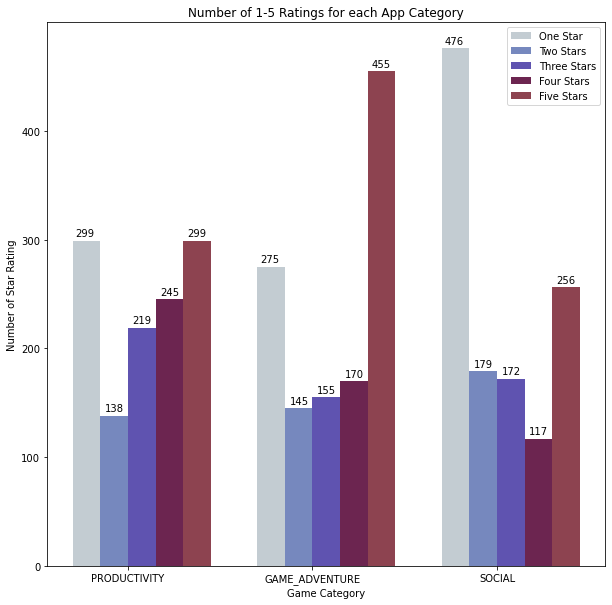

In [69]:
# Grabbing the category labels
labels = data_df['Category'].unique()

# Grabbing star review from each category
one_star = data2.values[0::5]
two_star = data2.values[1::5]
three_star = data2.values[2::5]
four_star = data2.values[3::5]
five_star = data2.values[4::5]

# Setting width and figure size
w = 0.15;
plt.figure(figsize=(10, 10));

# Grabbing the position of the bars 
r1 = np.arange(len(labels))
r2 = [i + w for i in r1]
r3 = [i + w for i in r2]
r4 = [i + w for i in r3]
r5 = [i + w for i in r4]

# Plotting the bar charts
plt.bar(r1, one_star, width = w, label = 'One Star', color = '#c3ccd2');
plt.bar(r2, two_star, width = w, label = 'Two Stars', color = '#7688be');
plt.bar(r3, three_star, width = w, label = 'Three Stars', color = '#5f53b0');
plt.bar(r4, four_star, width = w, label = 'Four Stars', color = '#6c2550');
plt.bar(r5, five_star, width = w, label = 'Five Stars', color = '#8d4350');

# Setting labels
plt.xticks(r1 + w + w/2, labels);
plt.xlabel('Game Category')
plt.ylabel('Number of Star Rating');
plt.title('Number of 1-5 Ratings for each App Category');


# Setting the value over the bars
for index, value in enumerate(one_star):
    plt.text(index - 0.06,value+4, str(value))
    
for index, value in enumerate(two_star):
    plt.text(index + 0.1,value+4, str(value))

for index, value in enumerate(three_star):
    plt.text(index + 0.25,value+4, str(value))
    
for index, value in enumerate(four_star):
    plt.text(index + 0.4,value+4, str(value))
    
for index, value in enumerate(five_star):
    plt.text(index + 0.545,value+4, str(value))

# Adding legend
plt.legend();

# Saving figure
#plt.savefig('StarPerStarPerCat.png')

### Common words in a review sorted by stars

In [70]:
# Adding stopwords that the nltk library missed
new_stopwords = stopwords.words() + ['I', ',', "n't", '!', "'", 'For',\
                                     ".", "It'", 'It', '-', "'ll", "'m",\
                                     "'s", '/', "My", 'The', "'ve", 'So',\
                                     'A', 'This', ')', '(', '?', ':', ';',\
                                     'But', 'though', "'re"]

# Creating a dictionary of the tokenized review string without the stop words
tokenized_words = {}
# Tokenizing the Review column
for i, review in enumerate(data_df["Review"]):
    text_tokens = word_tokenize(review)
    tokens_without_sw = [word for word in text_tokens if not word in new_stopwords]
    tokenized_words[i] = ' '.join(tokens_without_sw)

In [71]:
tokenized_words

{0: 'GREAT app Really love Edit said great give alarm limited time focus frustrating easily get app & use apps Trees Deep focus mode need premium subscription 🙄 When keep phone outside view & set time reach goal within time give alarm time become look back',
 1: 'really great app using since long recent update ruined experience Now access phone settings alarm clock even system launcher planting tree even make phone call without withering tree obviously whitelist well free account request developers please put things whitelist default bring back previous version ....',
 2: 'put words much app provides needs actions By upgrading plus able plant real trees comfort home indeed worth affordable sustainable well creators great job using app 3 years failed since Suggestion create extension works like momentum timer chrome go away click Thanks',
 3: 'would given 5 stars since app helpful concentrating Only since last update seems bug see statistics anymore none forests whole week month see act

In [72]:
# Creating data frame of the tokenized review string
token = pd.DataFrame([tokenized_words], index=['TokenReview']).transpose()
# Vertically concatenating to our dataframe
data_df = pd.concat([data_df, token], axis=1)

In [73]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3     Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4     Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
...                    ...           ...        ...    ...   
3595                TikTok        SOCIAL 2021-10-07      1   
3596                TikTok        SOCIAL 2021-09-27      5   
3597                TikTok        SOCIAL 2021-10-10      5   
3598                TikTok        SOCIAL 2021-10-15      1   
3599                TikTok        SOCIAL 2021-10-02      5   

                                                 Review  Likes  \
0     GREAT app. Really love this Edit: I said it gr...      9   
1     It's really a great app and I've been using it...      2   
2     I can't put into words how much this app provi...     72   
3     I would have given 5 stars, since this app is ...    211   
4     Amazing App only had it for a few days and it'...     93   
...                                                 ...    ...   
3595  I really do not like the things that people ca...     12   
3596  Love this app. So many video editing skills I ...     54   
3597  Pretty cool! I like the features and the conte...      2   
3598  It us it is Impossible to add a downloaded vid...      1   
3599  Great content, engaging and strong fan base an...     89   

                                            TokenReview  
0     GREAT app Really love Edit said great give ala...  
1     really great app using since long recent updat...  
2     put words much app provides needs actions By u...  
3     would given 5 stars since app helpful concentr...  
4     Amazing App days already helping productivity ...  
...                                                 ...  
3595  really like things people put TikTok really ha...  
3596  Love app many video editing skills learned app...  
3597  Pretty cool like features content creators The...  
3598  us Impossible add downloaded video film video ...  
3599  Great content engaging strong fan base loads e...  

[3600 rows x 7 columns]

In [75]:
#Counts top 100 most common words for each category and star grouping
data_df.groupby(['Stars','Category'])['TokenReview'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))

Stars  Category      
1      GAME_ADVENTURE    [(game, 350), (play, 99), (get, 88), (even, 84...
       PRODUCTIVITY      [(calendar, 133), (app, 119), (update, 108), (...
       SOCIAL            [(app, 415), (account, 176), (Instagram, 160),...
2      GAME_ADVENTURE    [(game, 185), (get, 44), (play, 41), (even, 35...
       PRODUCTIVITY      [(app, 78), (calendar, 69), (widget, 40), (new...
       SOCIAL            [(app, 168), (like, 57), (account, 56), (Insta...
3      GAME_ADVENTURE    [(game, 281), (get, 70), (like, 68), (really, ...
       PRODUCTIVITY      [(app, 76), (calendar, 49), (Google, 40), (......
       SOCIAL            [(app, 142), (like, 46), (videos, 43), (get, 4...
4      GAME_ADVENTURE    [(game, 358), (get, 93), (like, 86), (really, ...
       PRODUCTIVITY      [(app, 161), (time, 45), (good, 40), (calendar...
       SOCIAL            [(app, 107), (like, 38), (good, 38), (videos, ...
5      GAME_ADVENTURE    [(game, 523), (love, 102), (fun, 94), (play, 9...
   

In [86]:
#creating the second stopwords list for word cloud
stopwords2 = set(STOPWORDS)
#adding in words
stopwords2.update(['game', 'app', 'Instagram', 'Forest', 'Pokemon', 'Go', 'Genshin', 'Impact', 'TikTok', 'Tik Tok', 'calendar', 'video', 'people', 'videos'])

In [87]:
def word_cloud_maker(title, star_num):
    '''
    Takes title and number of stars and creates a word cloud with the data
    '''
    plt.figure(figsize=(15, 15))
    #create dataframe with provided title entries
    title_df = data_df[data_df['Title']==title]
    #turns all the text in dataframe section into one long string
    text = ' '.join(review for review in title_df[title_df['Stars'] == star_num]['TokenReview'])
    #create word cloud
    wordcloud = WordCloud(stopwords=stopwords2, max_font_size=60, background_color='white', colormap='twilight').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title}: {star_num} star review wordcloud")
    #plt.savefig(f"{title}{star_num}StarReviewWordCloud.png")

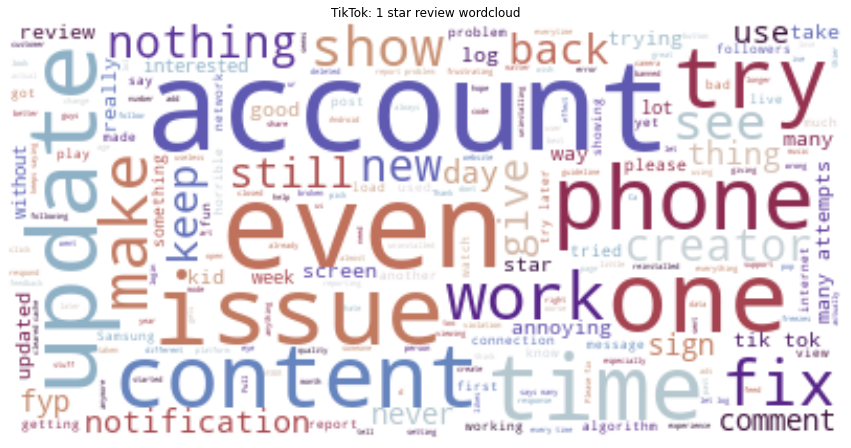

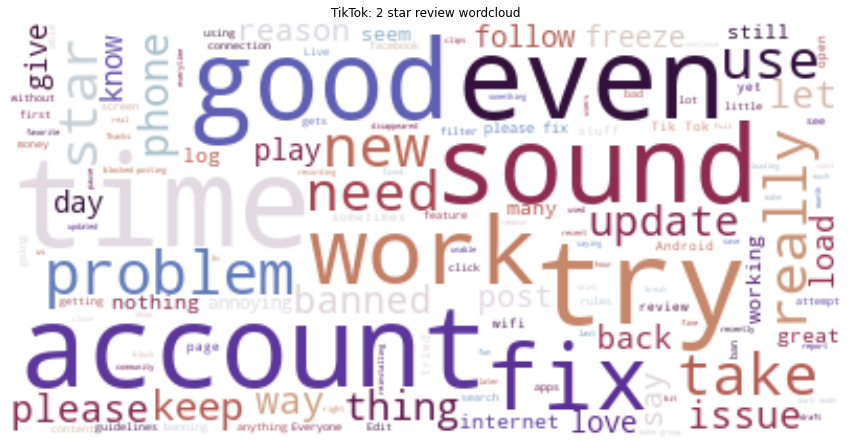

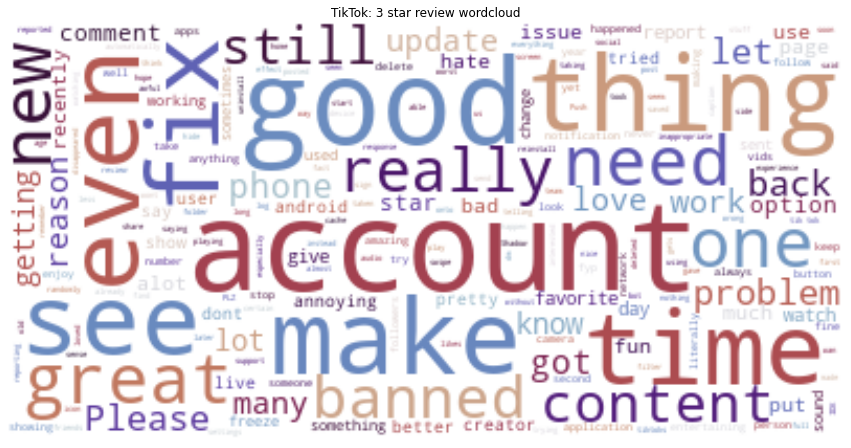

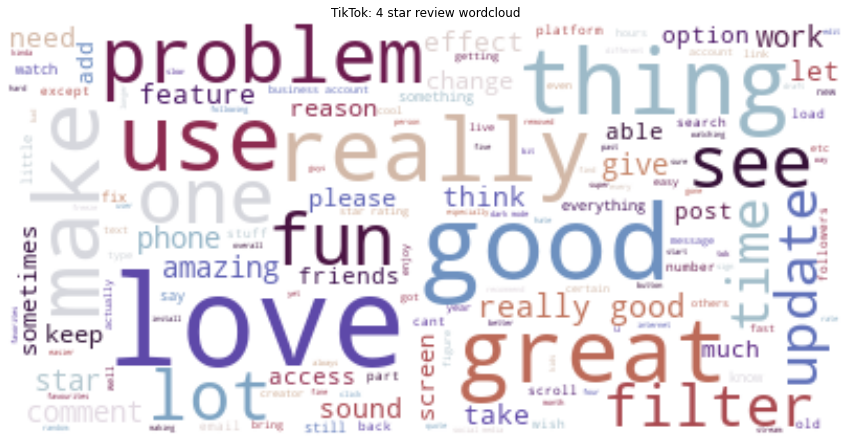

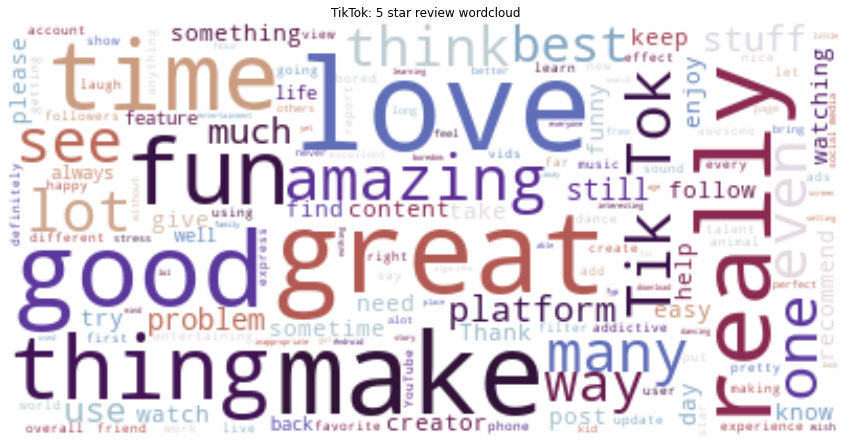

In [96]:
#making word cloud for each star rating
for i in [1,2,3,4,5]: 
    word_cloud_maker('TikTok', i)

### Stars over a period

In [33]:
#list of different titles
data_df['Title'].unique()

array(['Forest: Stay focused', 'Google Calendar', 'Genshin Impact',
       'Pokémon GO', 'Instagram', 'TikTok'], dtype=object)

In [94]:
def stars_over_date(title):
    '''
    Creates a graph for star rating over date range for a given app based on title
    '''
    #creates data frame of specific app 
    title_df = data_df[data_df['Title'] == title]
    title_df = title_df[['Title','Date' ,'Stars']]
    #sort values by date
    title_df = title_df.sort_values('Date')
    plt.figure(figsize=(17,5))
    #creating a line graph
    plt.plot(title_df['Date'].unique(), title_df.groupby('Date')['Stars'].mean(), linewidth = 5,color = '#5f53b0')
    plt.title(f'{title}: Star Rating Over Date Range')
    plt.ylim([0, 5])
    plt.xlabel('Date')
    plt.ylabel('Star Rating')
    plt.savefig(f"{title}StarsOverPeriod.png")

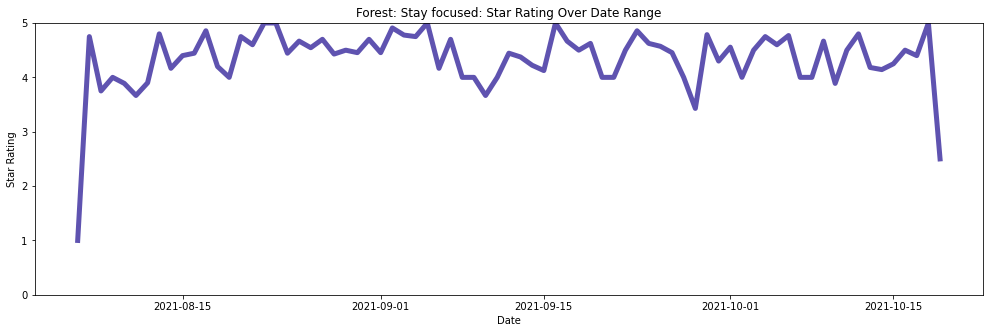

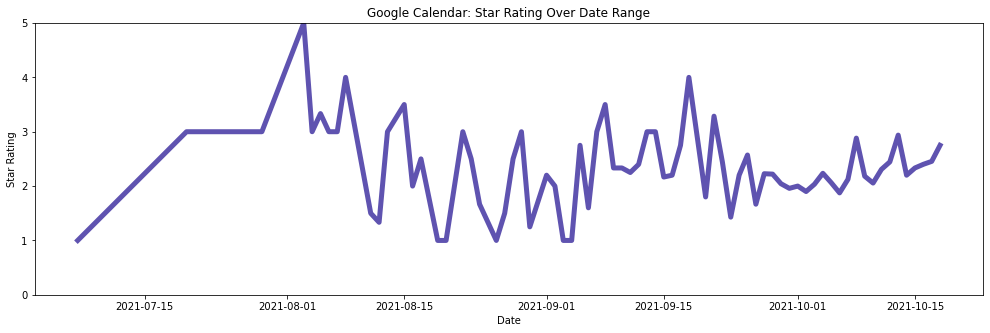

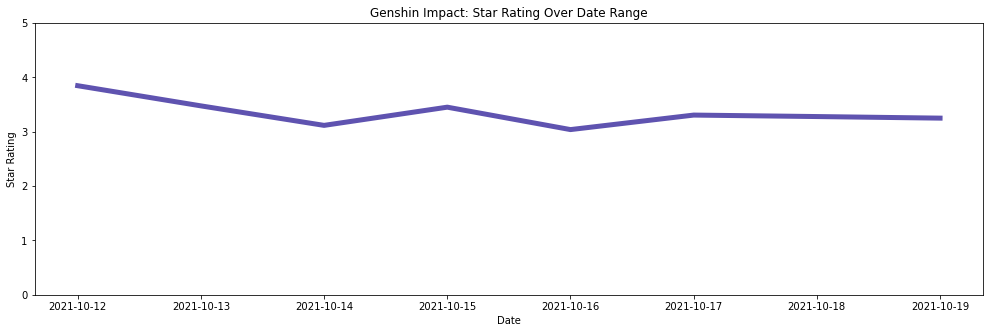

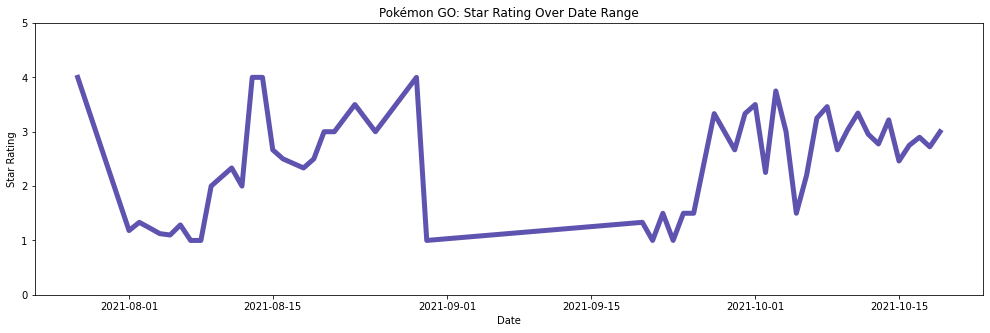

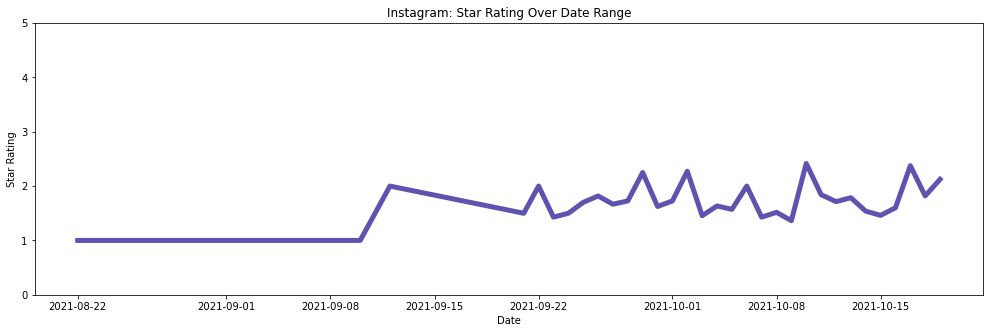

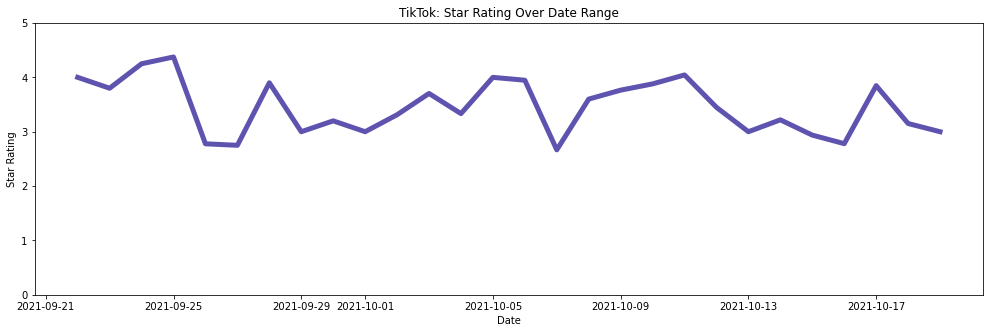

In [95]:
# Calling above function to create the graphs
for title in data_df['Title'].unique():
    stars_over_date(title)

### Likes per Star

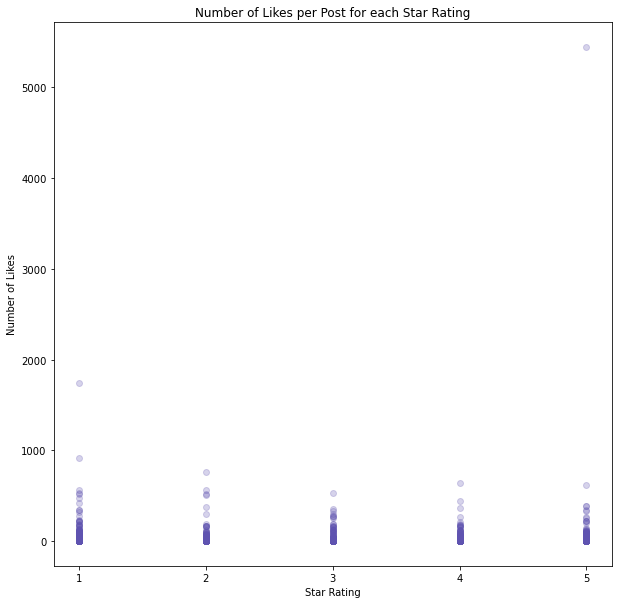

In [37]:
#creatubg a dot graph for number of likes each post has relative to number of stars
plt.figure(figsize=(10, 10))
plt.plot(data_df['Stars'], data_df['Likes'], 'o', color = '#5f53b0', alpha = 0.25)
plt.xlabel('Star Rating')
plt.ylabel('Number of Likes')
plt.title('Number of Likes per Post for each Star Rating')
plt.xticks(np.arange(min(data_df['Stars']), max(data_df['Stars'])+1, 1.0));
plt.savefig("LikeStarsCount.png");

### Avg Likes per Star

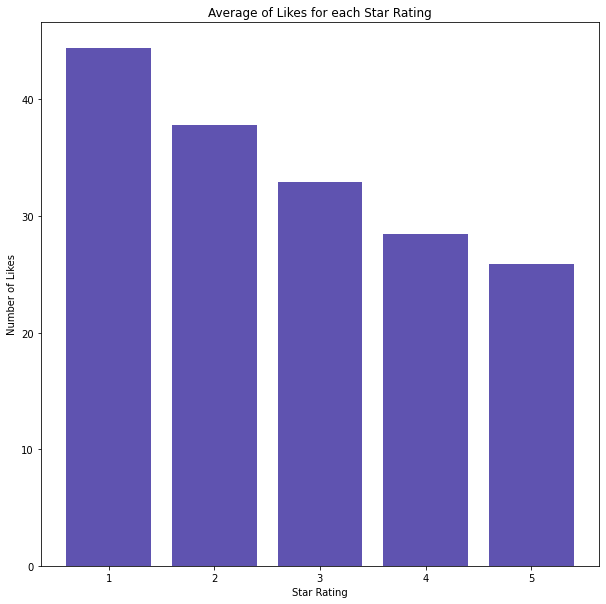

In [38]:
#creates a graph for average amount of likes for each star

like_star_avg = data_df.groupby('Stars')['Likes'].mean()
plt.figure(figsize=(10, 10))
plt.xlabel('Star Rating')
plt.ylabel('Number of Likes')
plt.title('Average of Likes for each Star Rating')
plt.bar([1,2,3,4,5], like_star_avg, color = '#5f53b0');
plt.savefig("LikeStarsAvg.png");

In [40]:
#creates new dictionary with length of review and index
review_len = {i: len(review) for i, review in enumerate(data_df['Review'])}

In [41]:
#adds to main dataframe
length = pd.DataFrame([review_len], index=['ReviewLen']).transpose()

data_df = pd.concat([data_df, length], axis=1)

In [42]:
data_df

Title      Category       Date  Stars  \
0     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
1     Forest: Stay focused  PRODUCTIVITY 2021-10-19      1   
2     Forest: Stay focused  PRODUCTIVITY 2021-10-16      5   
3     Forest: Stay focused  PRODUCTIVITY 2021-09-27      4   
4     Forest: Stay focused  PRODUCTIVITY 2021-09-29      4   
...                    ...           ...        ...    ...   
1355                TikTok        SOCIAL 2021-10-16      3   
1356                TikTok        SOCIAL 2021-10-14      2   
1357                TikTok        SOCIAL 2021-09-29      3   
1358                TikTok        SOCIAL 2021-10-17      1   
1359                TikTok        SOCIAL 2021-10-18      3   

                                                 Review  Likes  \
0     GREAT app. Really love this Edit: I said it gr...      9   
1     It's really a great app and I've been using it...      2   
2     I can't put into words how much this app provi...     72   
3     I would have given 5 stars, since this app is ...    211   
4     Amazing App only had it for a few days and it'...     93   
...                                                 ...    ...   
1355  I like it but sometimes it gets stuck and I ha...     43   
1356  When I recently updated the app my for you pag...    164   
1357  I've been using the app since 2020, but the ne...    336   
1358  The Not Interested button doesn't work. I've u...    421   
1359  I have used this for almost 3 years without a ...     14   

                                            TokenReview  ReviewLen  
0     GREAT app Really love Edit said great give ala...        408  
1     really great app using since long recent updat...        473  
2     put words much app provides needs actions By u...        447  
3     would given 5 stars since app helpful concentr...        358  
4     Amazing App days already helping productivity ...        499  
...                                                 ...        ...  
1355  like sometimes gets stuck swipe swipe back see...        174  
1356  When recently updated app page became differen...        288  
1357  using app since 2020 new update annoying hell ...        466  
1358  Not Interested button work uninstalled cleared...        337  
1359  used almost 3 years without problem except get...        235  

[1360 rows x 8 columns]

### Length of review relative to stars

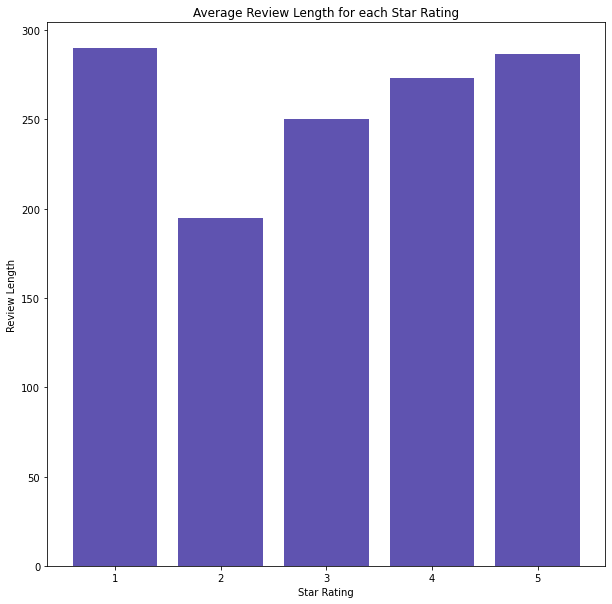

In [43]:
#Creates graph for length of review relative to star rating
plt.figure(figsize=(10, 10))
plt.bar(data_df['Stars'].unique(), data_df.groupby(['Stars'])['ReviewLen'].mean(), color = '#5f53b0');
plt.xlabel('Star Rating');
plt.ylabel('Review Length');
plt.title('Average Review Length for each Star Rating');
plt.savefig("ReviewLengthStar.png");